## MOST POPULAR RESTAURANTS PER CLUSTER

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [3]:
!ls

Alameda_Hospital_Venues.csv
Category:Hospitals_in_the_San_Francisco_Bay_Area
FOOD&HEALTHWorkersBAYAREA.csv
Geospatial_data
Hospital Name and Location Scrape Notebooks.ipynb
Hospital_locations
Hospital_locations.csv
IBM Coursera Capstone.ipynb
Introduction and Business Project --IBM COURSERA PROJECT
README.md
Segmenting Neighborhoods in Toronto.ipynb
Untitled.ipynb
bay_area_geo.cvs
clustered_hospitals_sf.html
food_Workers_dist_sf.html
food_Workers_dist_sf_and_hospitals.html
food_Workers_dist_sf_and_hospitals_red.html
food_Workers_percentofworkforce+hospitals_sf.html
food_health_workers.csv
health_Workers_dist_sf.html
health_Workers_percentofworkforce+hospitals_sf.html
hospital_venues_ratings.csv
hospitals_sf.html
hospitals_sf.png
postalcodesT


In [95]:
# Load ratings and hospital clusters
df_venues_ratings = pd.read_csv('hospital_venues_ratings.csv')

In [96]:
df_venues_ratings

,Unnamed: 0,Hospital,Hospital Latitude,Hospital Longitude,Venue City,Venue,Venue Latitude,Venue Longitude,Venue Category,yelp_link,rating,reviews
0,0,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Premier Pizza,37.394546,-121.946428,Pizza Place,https://www.yelp.com/biz/premier-pizza-santa-c...,3.5 star rating,360 reviews
1,1,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Great Indian Cuisine,37.394322,-121.959752,Indian Restaurant,https://www.yelp.com/biz/great-indian-cuisine-...,4 star rating,488 reviews
2,2,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Easterly Hunan Cuisine,37.394570,-121.945728,Chinese Restaurant,https://www.yelp.com/biz/easterly-hunan-cuisin...,3.5 star rating,140 reviews
3,3,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Jersey Mike's Subs,37.394932,-121.945820,Sandwich Place,https://www.yelp.com/biz/jersey-mikes-subs-san...,3.5 star rating,214 reviews
4,4,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Logan's Big Dawgs,37.394181,-121.959764,Food Truck,https://www.yelp.com/biz/logans-big-dawgs-sant...,4.5,117
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Hard Knox Cafe,37.757564,-122.388313,Southern / Soul Food Restaurant,https://www.yelp.com/biz/hard-knox-cafe-san-fr...,4 star rating,2155 reviews
1556,1556,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Casey’s Pizza,37.773783,-122.391495,Pizza Place,https://www.yelp.com/biz/casey’s-pizza-san-fra...,0,0
1557,1557,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Sunflower,37.762609,-122.397538,Vietnamese Restaurant,https://www.yelp.com/biz/sunflower-san-francisco,0,0
1558,1558,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Esposto's Delicatessen,37.766888,-122.393159,Deli / Bodega,https://www.yelp.com/biz/espostos-delicatessen...,4 star rating,68 reviews


In [97]:
# make rating and review columns numerical 
df_venues_ratings['rating'] = df_venues_ratings['rating'].str.replace('star rating', '')


In [106]:
df_venues_ratings['reviews'] = df_venues_ratings['reviews'].str.replace('reviews', '')
df_venues_ratings['reviews'] = df_venues_ratings['reviews'].str.replace('\[\]', '0')

/Users/shhuds/opt/anaconda3/envs/geo_folium/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shhuds/opt/anaconda3/envs/geo_folium/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
# drop all Null value reviews and ratings entries 
df_venues_ratings = df_venues_ratings[df_venues_ratings['rating'] != "[]"].reset_index()

/Users/shhuds/opt/anaconda3/envs/geo_folium/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [107]:
# check that only reviewed venues are in the data set
df_venues_ratings[df_venues_ratings['reviews'] == "[]"]

,Unnamed: 0,Hospital,Hospital Latitude,Hospital Longitude,Venue City,Venue,Venue Latitude,Venue Longitude,Venue Category,yelp_link,rating,reviews


In [108]:
# change from string to float
df_venues_ratings['rating']  = df_venues_ratings['rating'].astype(float)

/Users/shhuds/opt/anaconda3/envs/geo_folium/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
# drop extra columns
df_venues_ratings.drop(columns=['index', 'Unnamed: 0'], inplace=True)
df_venues_ratings

,Hospital,Hospital Latitude,Hospital Longitude,Venue City,Venue,Venue Latitude,Venue Longitude,Venue Category,yelp_link,rating,reviews
0,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Premier Pizza,37.394546,-121.946428,Pizza Place,https://www.yelp.com/biz/premier-pizza-santa-c...,3.5,360
1,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Great Indian Cuisine,37.394322,-121.959752,Indian Restaurant,https://www.yelp.com/biz/great-indian-cuisine-...,4.0,488
2,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Easterly Hunan Cuisine,37.394570,-121.945728,Chinese Restaurant,https://www.yelp.com/biz/easterly-hunan-cuisin...,3.5,140
3,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Jersey Mike's Subs,37.394932,-121.945820,Sandwich Place,https://www.yelp.com/biz/jersey-mikes-subs-san...,3.5,214
4,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Logan's Big Dawgs,37.394181,-121.959764,Food Truck,https://www.yelp.com/biz/logans-big-dawgs-sant...,4.5,117
...,...,...,...,...,...,...,...,...,...,...,...
1276,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Hard Knox Cafe,37.757564,-122.388313,Southern / Soul Food Restaurant,https://www.yelp.com/biz/hard-knox-cafe-san-fr...,4.0,2155
1277,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Casey’s Pizza,37.773783,-122.391495,Pizza Place,https://www.yelp.com/biz/casey’s-pizza-san-fra...,0.0,0
1278,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Sunflower,37.762609,-122.397538,Vietnamese Restaurant,https://www.yelp.com/biz/sunflower-san-francisco,0.0,0
1279,"University of California, San Francisco Fetal ...",37.765567,-122.389776,San Francisco,Esposto's Delicatessen,37.766888,-122.393159,Deli / Bodega,https://www.yelp.com/biz/espostos-delicatessen...,4.0,68


## most highly rated venues

In [132]:
# highest mean ratings by venue category and hospital
rated_venues_types = df_venues_ratings.groupby(['Hospital', 'Venue Category',])['rating'].mean().to_frame()

In [133]:
rated_venues_types

rating
Hospital                               Venue Category                 
Adventist Health Clear Lake            American Restaurant        3.75
                                       Café                       4.50
                                       Donut Shop                 4.50
                                       Fast Food Restaurant       2.00
                                       Mexican Restaurant         4.50
...                                                                ...
Veterans Home of California Yountville Mexican Restaurant         3.50
                                       New American Restaurant    4.00
                                       Pizza Place                4.00
                                       Restaurant                 4.50
                                       Spanish Restaurant         4.00

[891 rows x 1 columns]

In [134]:
rated_venues = df_venues_ratings.groupby(['Hospital', 'Venue', 'Venue Category', 'reviews'])['rating'].mean().to_frame()

In [255]:
# Grouping by high ratings without using groupby
rated_v = df_venues_ratings[['Hospital', 'Venue', 'Venue Category', 'reviews', 'rating']]

In [261]:
# Venues with rating over 4
rated_v = rated_v[rated_v['rating']>4]
rated_v

,Hospital,Venue,Venue Category,reviews,rating
4,Agnews Developmental Center,Logan's Big Dawgs,Food Truck,117,4.5
9,Agnews Developmental Center,Chicken Meets Rice,Restaurant,665,4.5
20,Agnews Developmental Center,Big Ed's Buzzard BBQ,BBQ Joint,298,4.5
28,Alameda Hospital,Doggy-Style Hot Dogs,Hot Dog Joint,335,4.5
32,Alameda Hospital,Utzutzu,Sushi Restaurant,74,4.5
...,...,...,...,...,...
1262,"University of California, San Francisco Fetal ...",Chez Maman East,French Restaurant,2074,4.5
1265,"University of California, San Francisco Fetal ...",Parker Cafe,Café,182,4.5
1266,"University of California, San Francisco Fetal ...",Wooly Pig,Sandwich Place,657,4.5
1271,"University of California, San Francisco Fetal ...",Marcella's Lasagneria & Cucina,Italian Restaurant,374,4.5


In [340]:
# loading venue data with geolocation informatoin
venues_lat = pd.read_csv('data/hospital_venues_ratings.csv')
venues_lat.head()

,Unnamed: 0,Hospital,Hospital Latitude,Hospital Longitude,Venue City,Venue,Venue Latitude,Venue Longitude,Venue Category,yelp_link,rating,reviews
0,0,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Premier Pizza,37.394546,-121.946428,Pizza Place,https://www.yelp.com/biz/premier-pizza-santa-c...,3.5 star rating,360 reviews
1,1,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Great Indian Cuisine,37.394322,-121.959752,Indian Restaurant,https://www.yelp.com/biz/great-indian-cuisine-...,4 star rating,488 reviews
2,2,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Easterly Hunan Cuisine,37.394570,-121.945728,Chinese Restaurant,https://www.yelp.com/biz/easterly-hunan-cuisin...,3.5 star rating,140 reviews
3,3,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Jersey Mike's Subs,37.394932,-121.945820,Sandwich Place,https://www.yelp.com/biz/jersey-mikes-subs-san...,3.5 star rating,214 reviews
4,4,Agnews Developmental Center,37.394663,-121.959125,Santa Clara,Logan's Big Dawgs,37.394181,-121.959764,Food Truck,https://www.yelp.com/biz/logans-big-dawgs-sant...,4.5,117


# Merge Data Sets

In [360]:
# Merge high ratings dataset and geolocation data
rated_merge = rated_v.merge(venues_lat, how='left', left_on='Venue', right_on='Venue')

In [361]:
rated_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 4 to 1280
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hospital        223 non-null    object 
 1   Venue           223 non-null    object 
 2   Venue Category  223 non-null    object 
 3   reviews         223 non-null    object 
 4   rating          223 non-null    float64
dtypes: float64(1), object(4)
memory usage: 10.5+ KB


In [441]:
clusters = pd.read_csv('data/Hospital_CLusters_and_venues.csv')

In [442]:
clusters.head()

,name,lat,lng,address,locale,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agnews Developmental Center,37.394663,-121.959125,"Agnew, Santa Clara, CA 95054, USA",Santa Clara,2,Mexican Restaurant,Steakhouse,Indian Restaurant,Vietnamese Restaurant,Food Truck,Restaurant,Bakery,Breakfast Spot,Hawaiian Restaurant,Japanese Restaurant
1,Alameda Hospital,37.762677,-122.254155,"2070 Clinton Ave, Alameda, CA 94501, USA",Alameda,2,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Diner,Bakery,Café,Hot Dog Joint,Italian Restaurant
2,Alcatraz Hospital,37.785467,-122.439318,"2356 Sutter St, San Francisco, CA 94115, USA",San Francisco,1,Bakery,Sushi Restaurant,Indian Restaurant,American Restaurant,Pizza Place,Café,Sandwich Place,Vietnamese Restaurant,Italian Restaurant,Mexican Restaurant
3,Alta Bates Summit Medical Center,37.821648,-122.262967,"350 Hawthorne Ave, Oakland, CA 94609, USA",Oakland,2,American Restaurant,Mexican Restaurant,Korean Restaurant,Mac & Cheese Joint,Bakery,Indian Restaurant,Burger Joint,Ethiopian Restaurant,Pet Café,Latin American Restaurant
4,Brookside Hospital,37.953721,-122.337278,"Brookside Hospital Heliport, San Pablo, CA 948...",San Pablo,2,Mexican Restaurant,Food Truck,American Restaurant,Fast Food Restaurant,Thai Restaurant,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Korean Restaurant,Seafood Restaurant


In [473]:
cluster_dict = {}
for x in clusters.index:
    cluster_dict[clusters.iloc[x, 0]] = clusters.iloc[x, 5]

In [474]:
rated_merge['Cluster'] = rated_merge['Hospital_x'].map(cluster_dict)

In [480]:
rated_merge = rated_merge[rated_merge['Cluster'].notnull()]

In [481]:
rated_merge.head()

,Hospital_x,Venue,Venue Category_x,reviews_x,rating_x,Hospital Latitude,Hospital Longitude,Venue City,Venue Latitude,Venue Longitude,yelp_link,Cluster
0,Agnews Developmental Center,Logan's Big Dawgs,Food Truck,117,4.5,37.394663,-121.959125,Santa Clara,37.394181,-121.959764,https://www.yelp.com/biz/logans-big-dawgs-sant...,2.0
1,Agnews Developmental Center,Chicken Meets Rice,Restaurant,665,4.5,37.394663,-121.959125,Santa Clara,37.408099,-121.963464,https://www.yelp.com/biz/chicken-meets-rice-sa...,2.0
2,Agnews Developmental Center,Big Ed's Buzzard BBQ,BBQ Joint,298,4.5,37.394663,-121.959125,Santa Clara,37.384812,-121.948989,https://www.yelp.com/biz/big-eds-buzzard-bbq-s...,2.0
3,Alameda Hospital,Doggy-Style Hot Dogs,Hot Dog Joint,335,4.5,37.762677,-122.254155,Alameda,37.761648,-122.244870,https://www.yelp.com/biz/doggy-style-hot-dogs-...,2.0
4,Alameda Hospital,Utzutzu,Sushi Restaurant,74,4.5,37.762677,-122.254155,Alameda,37.764925,-122.242121,https://www.yelp.com/biz/utzutzu-alameda,2.0


In [390]:
rated_merge[rated_merge['Hospital_x'] == 'San Francisco Chinese Hospital']

,Hospital_x,Venue,Venue Category_x,reviews_x,rating_x,Hospital Latitude,Hospital Longitude,Venue City,Venue Latitude,Venue Longitude,yelp_link
263,San Francisco Chinese Hospital,Molinari Delicatessen,Deli / Bodega,1115,4.5,37.795529,-122.408964,San Francisco,37.798388,-122.407880,https://www.yelp.com/biz/molinari-delicatessen...
264,San Francisco Chinese Hospital,The House,Asian Restaurant,4836,4.5,37.795529,-122.408964,San Francisco,37.798434,-122.407187,https://www.yelp.com/biz/the-house-san-francisco
268,San Francisco Chinese Hospital,il Casaro Pizzeria & Mozzarella Bar,Pizza Place,1154,4.5,37.795529,-122.408964,San Francisco,37.798447,-122.407447,https://www.yelp.com/biz/il-casaro-pizzeria-an...
269,San Francisco Chinese Hospital,Eight Tables by George Chen,Chinese Restaurant,124,4.5,37.795529,-122.408964,San Francisco,37.798355,-122.407792,https://www.yelp.com/biz/eight-tables-by-georg...
270,San Francisco Chinese Hospital,Family Cafe,Café,52,4.5,37.795529,-122.408964,San Francisco,37.798577,-122.407359,https://www.yelp.com/biz/family-cafe-san-franc...
271,San Francisco Chinese Hospital,Capo's,Pizza Place,817,4.5,37.795529,-122.408964,San Francisco,37.798644,-122.408362,https://www.yelp.com/biz/capos-san-francisco
272,San Francisco Chinese Hospital,Trestle,New American Restaurant,881,4.5,37.795529,-122.408964,San Francisco,37.796306,-122.404534,https://www.yelp.com/biz/trestle-san-francisco


In [389]:
rated_merge.drop(index=[265], inplace=True)

In [356]:
len(rated_merge['Venue'].unique())

157

In [364]:
rated_merge.drop(columns=['Hospital_y', 'Venue Category_y', 'rating_y', 'reviews_y', 'Unnamed: 0'], inplace=True)

In [366]:
rated_merge.drop_duplicates(subset = ['Hospital_x', 'Venue', 'Venue Latitude', 'Venue Longitude'], inplace=True)

In [394]:
food = rated_merge.groupby(['Venue Category_x'])['Hospital_x'].count()

In [437]:
icon_dict = {}
for x in food.index:
    
    if 'restaurant' in x.lower():
        icon_dict[x] = {'icon': 'cutlery'}
        
    elif 'pizza' in x.lower():
         icon_dict[x] = {'icon': 'flag'}
            
    elif 'hot dog' in x.lower():
         icon_dict[x] = {'icon': 'flag'}
            
    elif 'burger' in x.lower():
         icon_dict[x] = {'icon': 'flag'}
            
    elif 'bakery' in x.lower():
         icon_dict[x] = {'icon': 'birthday-cake'}
            
    elif 'truck' in x.lower():
         icon_dict[x] = {'icon': 'truck'}
            
    elif 'breakfast' in x.lower():
         icon_dict[x] = {'icon': 'lemon-o'}
    
    elif 'caf' in x.lower():
         icon_dict[x] = {'icon': 'coffee'}
            
    elif 'vegan' in x.lower():
         icon_dict[x] = {'icon': 'lemon-o'}
            
    elif 'place' or 'deli' in x.lower():
        icon_dict[x] = {'icon': 'circle-o'}
        
    elif 'pub' in x.lower():
        icon_dict[x] = {'icon': 'beer'}
    
    elif 'bbq' in x.lower():
        icon_dict[x] = {'icon': 'circle-o'}
    
    else:
         icon_dict[x] = {'icon': 'dot-circle'}

In [438]:
icon_dict

{'Afghan Restaurant': {'icon': 'cutlery'},
 'American Restaurant': {'icon': 'cutlery'},
 'Asian Restaurant': {'icon': 'cutlery'},
 'BBQ Joint': {'icon': 'circle-o'},
 'Bakery': {'icon': 'birthday-cake'},
 'Brazilian Restaurant': {'icon': 'cutlery'},
 'Breakfast Spot': {'icon': 'lemon-o'},
 'Burger Joint': {'icon': 'flag'},
 'Burmese Restaurant': {'icon': 'cutlery'},
 'Café': {'icon': 'coffee'},
 'Chinese Restaurant': {'icon': 'cutlery'},
 'Deli / Bodega': {'icon': 'circle-o'},
 'Donut Shop': {'icon': 'circle-o'},
 'Ethiopian Restaurant': {'icon': 'cutlery'},
 'Falafel Restaurant': {'icon': 'cutlery'},
 'Fast Food Restaurant': {'icon': 'cutlery'},
 'Filipino Restaurant': {'icon': 'cutlery'},
 'Food Truck': {'icon': 'truck'},
 'French Restaurant': {'icon': 'cutlery'},
 'Gastropub': {'icon': 'circle-o'},
 'German Restaurant': {'icon': 'cutlery'},
 'Greek Restaurant': {'icon': 'cutlery'},
 'Hawaiian Restaurant': {'icon': 'cutlery'},
 'Hot Dog Joint': {'icon': 'flag'},
 'Hotpot Restaurant':

# FIND FONT AWESOME ICONS TO USE FOR VENUE CATEGORIES AND MAKE FOLIUM MAPS OF VENUE DATA

In [372]:
rated_merge['Venue Category_x'].unique()

array(['Food Truck', 'Restaurant', 'BBQ Joint', 'Hot Dog Joint',
       'Sushi Restaurant', 'Mexican Restaurant', 'Afghan Restaurant',
       'Salad Place', 'Bakery', 'Café', 'American Restaurant',
       'Ramen Restaurant', 'New American Restaurant',
       'Burmese Restaurant', 'Breakfast Spot', 'Sandwich Place',
       'Donut Shop', 'Vegetarian / Vegan Restaurant', 'German Restaurant',
       'Turkish Restaurant', 'Southern / Soul Food Restaurant',
       'Kebab Restaurant', 'Pizza Place', 'Mediterranean Restaurant',
       'Ethiopian Restaurant', 'Fast Food Restaurant',
       'Brazilian Restaurant', 'Italian Restaurant', 'Thai Restaurant',
       'Greek Restaurant', 'Indian Restaurant',
       'Middle Eastern Restaurant', 'Scandinavian Restaurant',
       'French Restaurant', 'Portuguese Restaurant', 'Asian Restaurant',
       'Vietnamese Restaurant', 'Latin American Restaurant',
       'Korean Restaurant', 'Japanese Restaurant', 'Hotpot Restaurant',
       'Falafel Restaurant', '

In [376]:
# SF coordinates
sf_lat = 37.773972
sf_long = -122.431297

In [483]:
color_dict = {0:'blue', 1: 'green', 2: 'purple', 3:'orange', 4:'pink'}

In [486]:
clusters.head()

,name,lat,lng,address,locale,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agnews Developmental Center,37.394663,-121.959125,"Agnew, Santa Clara, CA 95054, USA",Santa Clara,2,Mexican Restaurant,Steakhouse,Indian Restaurant,Vietnamese Restaurant,Food Truck,Restaurant,Bakery,Breakfast Spot,Hawaiian Restaurant,Japanese Restaurant
1,Alameda Hospital,37.762677,-122.254155,"2070 Clinton Ave, Alameda, CA 94501, USA",Alameda,2,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Diner,Bakery,Café,Hot Dog Joint,Italian Restaurant
2,Alcatraz Hospital,37.785467,-122.439318,"2356 Sutter St, San Francisco, CA 94115, USA",San Francisco,1,Bakery,Sushi Restaurant,Indian Restaurant,American Restaurant,Pizza Place,Café,Sandwich Place,Vietnamese Restaurant,Italian Restaurant,Mexican Restaurant
3,Alta Bates Summit Medical Center,37.821648,-122.262967,"350 Hawthorne Ave, Oakland, CA 94609, USA",Oakland,2,American Restaurant,Mexican Restaurant,Korean Restaurant,Mac & Cheese Joint,Bakery,Indian Restaurant,Burger Joint,Ethiopian Restaurant,Pet Café,Latin American Restaurant
4,Brookside Hospital,37.953721,-122.337278,"Brookside Hospital Heliport, San Pablo, CA 948...",San Pablo,2,Mexican Restaurant,Food Truck,American Restaurant,Fast Food Restaurant,Thai Restaurant,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Korean Restaurant,Seafood Restaurant


In [499]:
for address in clusters['address']:
    try: 
        print(address.split())
        new_add = address.split()[:-3]
        new_add[-1] = new_add[-1].replace(',',"")
        print(" ".join(new_add))
    except:
        print(address, "NOT WORKING")

['Agnew,', 'Santa', 'Clara,', 'CA', '95054,', 'USA']
Agnew, Santa Clara
['2070', 'Clinton', 'Ave,', 'Alameda,', 'CA', '94501,', 'USA']
2070 Clinton Ave, Alameda
['2356', 'Sutter', 'St,', 'San', 'Francisco,', 'CA', '94115,', 'USA']
2356 Sutter St, San Francisco
['350', 'Hawthorne', 'Ave,', 'Oakland,', 'CA', '94609,', 'USA']
350 Hawthorne Ave, Oakland
['Brookside', 'Hospital', 'Heliport,', 'San', 'Pablo,', 'CA', '94806,', 'USA']
Brookside Hospital Heliport, San Pablo
['2000', 'Vale', 'Rd,', 'San', 'Pablo,', 'CA', '94806,', 'USA']
2000 Vale Rd, San Pablo
['2500', 'Grant', 'Rd,', 'Mountain', 'View,', 'CA', '94040,', 'USA']
2500 Grant Rd, Mountain View
['2425', 'Samaritan', 'Dr,', 'San', 'Jose,', 'CA', '95124,', 'USA']
2425 Samaritan Dr, San Jose
['2060', 'Fairmont', 'Dr,', 'San', 'Leandro,', 'CA', '94578,', 'USA']
2060 Fairmont Dr, San Leandro
['2540', 'East', 'St,', 'Concord,', 'CA', '94520,', 'USA']
2540 East St, Concord
['1601', 'Ygnacio', 'Valley', 'Rd,', 'Walnut', 'Creek,', 'CA', '945

In [503]:
clusters.drop(index=[33], inplace=True)

In [504]:
# create map of San Francisco using latitude and longitude values
map_sf = folium.Map(location=[sf_lat, sf_long], zoom_start=11)

# add markers to map
for lat, lng, hospital, address in zip(clusters['lat'], clusters['lng'],\
                              clusters['name'], clusters['address']):
    new_add = address.split()[:-3]
    new_add[-1] = new_add[-1].replace(',',"")
    new_add = " ".join(new_add)
    
    label = '{}\n{}'.format(hospital,new_add)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        location = [lat, lng],
        radius=5,
        popup=label,
        icon=folium.Icon(color="red",icon="ambulance", prefix='fa'),
        parse_html=False).add_to(map_sf)
    
    
for v_lat, v_long, name, category, rating, reviews, cluster in zip(rated_merge['Venue Latitude'], rated_merge['Venue Longitude'], \
                                         rated_merge['Venue'], rated_merge['Venue Category_x'], rated_merge['rating_x'], \
                                        rated_merge['reviews_x'], rated_merge['Cluster']):
        label = '{} has {} stars and {}reviews'.format(name, rating, reviews)
        label = folium.Popup(label, parse_html=True)
        color_ = color_dict[cluster]
        icon_ = icon_dict[category]['icon']
        folium.Marker(location = [v_lat, v_long], radius=2, popup=label,
             icon=folium.Icon(color=color_,icon=icon_, prefix='fa'),
              parse_html=False).add_to(map_sf)
                       
    
map_sf

In [505]:
#Save Map 
map_sf.save("Venue_clusters_hospitals_sf.html")

# Rated Venues By Hospital

In [135]:
rated_venues = rated_venues[rated_venues['rating']>=3.5]
rated_venues

rating
Hospital                               Venue                   Venue Category          reviews        
Adventist Health Clear Lake            Cactus Grill            Mexican Restaurant      110         4.5
                                       Castle Donuts           Donut Shop              18          4.5
                                       Catfish Coffee House    Café                    92          4.5
                                       Kour Thai Restaurant    Restaurant              84          4.0
                                       Main Street Bar & Grill American Restaurant     164         3.5
...                                                                                                ...
Veterans Home of California Yountville Redd Wood               Pizza Place             743         4.0
                                       Southside Cafe          Café                    99          4.5
                                       The French Laundry      French Restaurant       2584        4.5
                                       The Habit Burger Grill  Burger Joint            513         3.5
                                       ad hoc                  New American Restaurant 2844        4.0

[1119 rows x 1 columns]

# Hospital LEVEL INFORMATION

In [136]:
no = 1
hospit_venues = {}
list_of_hosp = [rated_venues.index.get_level_values(0).unique()]

for x in range(len(rated_venues.index.get_level_values(0).unique()[0])):
    hospit_venues[rated_venues.index.get_level_values(0).unique()[x]] = rated_venues.loc[rated_venues.index.get_level_values(0).unique()[x]]

In [137]:
list_of_df = []
for x in hospit_venues.keys():
    list_of_df.append(pd.DataFrame(hospit_venues[x]))

In [138]:
hospit_venues.keys()

dict_keys(['Adventist Health Clear Lake', 'Adventist Health St. Helena', 'Agnews Developmental Center', 'Alameda Hospital', 'Alcatraz Hospital', 'Alta Bates Summit Medical Center', 'Brookside Hospital', 'California Pacific Medical Center', 'Childrens Hospital Oakland', 'Davies Medical Center', 'Doctors Medical Center San Pablo Campus', 'El Camino Hospital', 'Friends of Laguna Honda Hospital', 'Good Samaritan Hospital (San Jose)', 'Highland Hospital (Oakland, California)', 'John George Psychiatric Pavilion', 'John Muir Medical Center (Concord Campus)', 'John Muir Medical Center (Walnut Creek Campus)', 'Kaiser Richmond Field Hospital', 'Langley Porter Psychiatric Institute', 'Letterman Army Hospital', 'Marys Help Hospital', 'Napa State Hospital', 'Naval Hospital Oakland', 'OConnor Hospital', 'Oakland Medical Center', 'Pacific Dispensary for Women and Children'])

In [139]:
df_AdventistHealthStHelena = list_of_df[1]
df_AdventistHealthStHelena

,,,rating
Venue,Venue Category,reviews,
Acacia House,Restaurant,140,4.0
Archetype,New American Restaurant,631,4.0
Cook St. Helena,Italian Restaurant,412,4.0
Evangeline,Bistro,385,4.0
Gillwoods Cafe,Breakfast Spot,278,4.0
Go Fish,Sushi Restaurant,164,4.0
Goose & Gander,American Restaurant,959,4.0
Gott's Roadside,Burger Joint,2016,4.0
Himalayan Sherpa Kitchen,Restaurant,317,4.5


In [140]:
df_AdventistHealthClearLake = list_of_df[0]
df_AdventistHealthClearLake

,,,rating
Venue,Venue Category,reviews,
Cactus Grill,Mexican Restaurant,110,4.5
Castle Donuts,Donut Shop,18,4.5
Catfish Coffee House,Café,92,4.5
Kour Thai Restaurant,Restaurant,84,4.0
Main Street Bar & Grill,American Restaurant,164,3.5
Pogo's Pizza Co.,Pizza Place,8,3.5
The Spot,American Restaurant,271,4.0


In [141]:
df_agnews = list_of_df[2]
df_agnews

,,,rating
Venue,Venue Category,reviews,
Amakai Japanese Cuisine,Japanese Restaurant,195,4.0
Athena Grill & Catering,Greek Restaurant,1533,4.0
Big Ed's Buzzard BBQ,BBQ Joint,298,4.5
Birk's Restaurant,Steakhouse,795,3.5
Bourbon Steak & Pub,Steakhouse,378,3.5
Chicken Meets Rice,Restaurant,665,4.5
Easterly Hunan Cuisine,Chinese Restaurant,140,3.5
Feride’s Bakery,Bakery,251,4.0
Flemings Prime Steakhouse & Wine Bar,Steakhouse,447,4.0


In [334]:
df_hos_clusters = pd.read_csv('Hospital_Clusters_and_venues.csv')

FileNotFoundError: [Errno 2] File Hospital_Clusters_and_venues.csv does not exist: 'Hospital_Clusters_and_venues.csv'

In [144]:
df_hos_clusters

,name,lat,lng,address,locale,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agnews Developmental Center,37.394663,-121.959125,"Agnew, Santa Clara, CA 95054, USA",Santa Clara,2,Mexican Restaurant,Steakhouse,Indian Restaurant,Vietnamese Restaurant,Food Truck,Restaurant,Bakery,Breakfast Spot,Hawaiian Restaurant,Japanese Restaurant
1,Alameda Hospital,37.762677,-122.254155,"2070 Clinton Ave, Alameda, CA 94501, USA",Alameda,2,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Diner,Bakery,Café,Hot Dog Joint,Italian Restaurant
2,Alcatraz Hospital,37.785467,-122.439318,"2356 Sutter St, San Francisco, CA 94115, USA",San Francisco,1,Bakery,Sushi Restaurant,Indian Restaurant,American Restaurant,Pizza Place,Café,Sandwich Place,Vietnamese Restaurant,Italian Restaurant,Mexican Restaurant
3,Alta Bates Summit Medical Center,37.821648,-122.262967,"350 Hawthorne Ave, Oakland, CA 94609, USA",Oakland,2,American Restaurant,Mexican Restaurant,Korean Restaurant,Mac & Cheese Joint,Bakery,Indian Restaurant,Burger Joint,Ethiopian Restaurant,Pet Café,Latin American Restaurant
4,Brookside Hospital,37.953721,-122.337278,"Brookside Hospital Heliport, San Pablo, CA 948...",San Pablo,2,Mexican Restaurant,Food Truck,American Restaurant,Fast Food Restaurant,Thai Restaurant,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Korean Restaurant,Seafood Restaurant
5,Doctors Medical Center San Pablo Campus,37.953091,-122.336511,"2000 Vale Rd, San Pablo, CA 94806, USA",San Pablo,2,Food Truck,American Restaurant,Mexican Restaurant,Fast Food Restaurant,Thai Restaurant,Latin American Restaurant,Vietnamese Restaurant,Sandwich Place,Korean Restaurant,Seafood Restaurant
6,El Camino Hospital,37.368848,-122.080185,"2500 Grant Rd, Mountain View, CA 94040, USA",Mountain View,0,Indian Restaurant,Sandwich Place,Sushi Restaurant,Mexican Restaurant,Pizza Place,South Indian Restaurant,Mediterranean Restaurant,Salad Place,Burger Joint,New American Restaurant
7,Good Samaritan Hospital (San Jose),37.252044,-121.946530,"2425 Samaritan Dr, San Jose, CA 95124, USA",San Jose,2,Sandwich Place,Mexican Restaurant,Burger Joint,Chinese Restaurant,Hot Dog Joint,Diner,Latin American Restaurant,Fast Food Restaurant,Donut Shop,Wings Joint
8,John George Psychiatric Pavilion,37.710840,-122.120215,"2060 Fairmont Dr, San Leandro, CA 94578, USA",San Leandro,2,Mexican Restaurant,Vietnamese Restaurant,American Restaurant,Sushi Restaurant,Deli / Bodega,Fast Food Restaurant,Breakfast Spot,Japanese Restaurant,Pizza Place,Dumpling Restaurant
9,John Muir Medical Center (Concord Campus),37.982900,-122.033756,"2540 East St, Concord, CA 94520, USA",Concord,2,Mexican Restaurant,Mediterranean Restaurant,Chinese Restaurant,Indian Restaurant,Breakfast Spot,Fried Chicken Joint,Vietnamese Restaurant,Italian Restaurant,Diner,Deli / Bodega


In [154]:
df_hos_clusters.groupby(['name','1st Most Common Venue','2nd Most Common Venue', \
                         '3rd Most Common Venue' ])['Cluster Labels'].mean().sort_values().to_frame()

,,,,Cluster Labels
name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,
St. Marys Medical Center (San Francisco),Café,Breakfast Spot,Middle Eastern Restaurant,0
San Francisco City Clinic,French Restaurant,Sushi Restaurant,Poke Place,0
UCSF Medical Center,Sandwich Place,Breakfast Spot,Sushi Restaurant,0
San Francisco Medical Center,Indian Restaurant,Sushi Restaurant,Mediterranean Restaurant,0
Langley Porter Psychiatric Institute,Breakfast Spot,Sushi Restaurant,Sandwich Place,0
El Camino Hospital,Indian Restaurant,Sandwich Place,Sushi Restaurant,0
Friends of Laguna Honda Hospital,Italian Restaurant,Sandwich Place,Sushi Restaurant,0
San Francisco VA Medical Center,Seafood Restaurant,American Restaurant,Chinese Restaurant,1
Naval Hospital Oakland,Burger Joint,Café,Pizza Place,1


In [197]:
most_common = df_hos_clusters[['3rd Most Common Venue']]

TypeError: no numeric data to plot

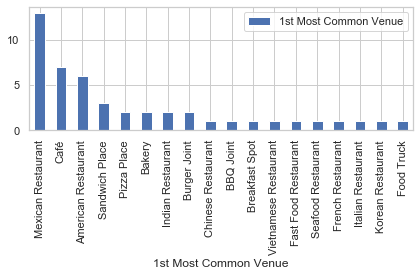

In [271]:
most_common = df_hos_clusters.groupby(['1st Most Common Venue'])['1st Most Common Venue'].count()
most_common.to_frame()
most_common.columns = ['Type', 'Frequency']
# most_common['Cluster_Labels'] = most_common.index.get_level_values(1)
most_common.sort_values(ascending=False).to_frame().plot(kind='bar')
plt.tight_layout()
plt.savefig('MostCommon.png')

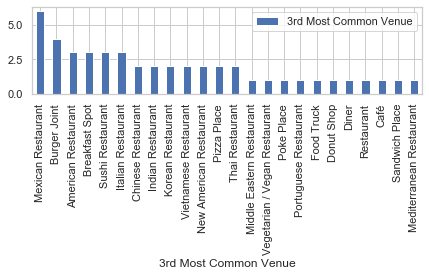

In [273]:
third_common = df_hos_clusters.groupby(['3rd Most Common Venue'])['3rd Most Common Venue'].count()
third_common.sort_values(ascending=False).to_frame().plot(kind='bar')
plt.tight_layout()
plt.savefig("3rd Most Common")

In [211]:
third_common

3rd Most Common Venue
American Restaurant              3
Breakfast Spot                   3
Burger Joint                     4
Café                             1
Chinese Restaurant               2
Diner                            1
Donut Shop                       1
Food Truck                       1
Indian Restaurant                2
Italian Restaurant               3
Korean Restaurant                2
Mediterranean Restaurant         1
Mexican Restaurant               6
Middle Eastern Restaurant        1
New American Restaurant          2
Pizza Place                      2
Poke Place                       1
Portuguese Restaurant            1
Restaurant                       1
Sandwich Place                   1
Sushi Restaurant                 3
Thai Restaurant                  2
Vegetarian / Vegan Restaurant    1
Vietnamese Restaurant            2
Name: 3rd Most Common Venue, dtype: int64

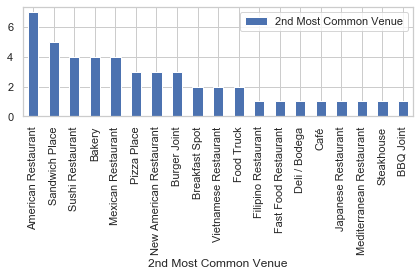

In [274]:
two_common = df_hos_clusters.groupby(['2nd Most Common Venue'])['2nd Most Common Venue'].count()
two_common.sort_values(ascending=False).to_frame().plot(kind='bar')
plt.tight_layout()
plt.savefig('2nd Most Common')
# most_common['Cluster_Labels'] = most_common.index.get_level_values(1)

In [206]:
two_common

2nd Most Common Venue
American Restaurant         7
BBQ Joint                   1
Bakery                      4
Breakfast Spot              2
Burger Joint                3
Café                        1
Deli / Bodega               1
Fast Food Restaurant        1
Filipino Restaurant         1
Food Truck                  2
Japanese Restaurant         1
Mediterranean Restaurant    1
Mexican Restaurant          4
New American Restaurant     3
Pizza Place                 3
Sandwich Place              5
Steakhouse                  1
Sushi Restaurant            4
Vietnamese Restaurant       2
Name: 2nd Most Common Venue, dtype: int64

In [209]:
most_common.index ^ two_common.index 

Index(['Chinese Restaurant', 'Deli / Bodega', 'Filipino Restaurant',
       'French Restaurant', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Korean Restaurant', 'Mediterranean Restaurant',
       'New American Restaurant', 'Seafood Restaurant', 'Steakhouse',
       'Sushi Restaurant'],
      dtype='object')

In [212]:
most_common.index ^ third_common.index 

Index(['BBQ Joint', 'Bakery', 'Diner', 'Donut Shop', 'Fast Food Restaurant',
       'French Restaurant', 'Mediterranean Restaurant',
       'Middle Eastern Restaurant', 'New American Restaurant', 'Poke Place',
       'Portuguese Restaurant', 'Restaurant', 'Seafood Restaurant',
       'Sushi Restaurant', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant'],
      dtype='object')

In [233]:
top_three = pd.merge(most_common, two_common, how='outer', left_on=most_common.index, right_on=two_common.index)

In [232]:
top_three = 0

In [235]:
top_three = pd.merge(top_three, third_common, how='outer', left_on='key_0', right_on=third_common.index)
top_three.fillna(0)

,key_0,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue_x,3rd Most Common Venue_y
0,American Restaurant,6.0,7.0,3.0,3.0
1,BBQ Joint,1.0,1.0,0.0,0.0
2,Bakery,2.0,4.0,0.0,0.0
3,Breakfast Spot,1.0,2.0,3.0,3.0
4,Burger Joint,2.0,3.0,4.0,4.0
5,Café,7.0,1.0,1.0,1.0
6,Chinese Restaurant,1.0,0.0,2.0,2.0
7,Fast Food Restaurant,1.0,1.0,0.0,0.0
8,Food Truck,1.0,2.0,1.0,1.0
9,French Restaurant,1.0,0.0,0.0,0.0


In [237]:
top_three.drop(columns=['3rd Most Common Venue_y'], inplace=True)

In [246]:
top_three.index.name= 'Venue Categories'

In [296]:
t

In [285]:
top_three['sum'] = top_three['1st Most Common Venue']+top_three['2nd Most Common Venue'] + top_three['3rd Most Common Venue_x']

In [300]:
top_three.index

Index(['American Restaurant', 'BBQ Joint', 'Bakery', 'Breakfast Spot',
       'Burger Joint', 'Café', 'Chinese Restaurant', 'Fast Food Restaurant',
       'Food Truck', 'French Restaurant', 'Indian Restaurant',
       'Italian Restaurant', 'Korean Restaurant', 'Mexican Restaurant',
       'Pizza Place', 'Sandwich Place', 'Seafood Restaurant',
       'Vietnamese Restaurant', 'Deli / Bodega', 'Filipino Restaurant',
       'Japanese Restaurant', 'Mediterranean Restaurant',
       'New American Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Diner',
       'Donut Shop', 'Middle Eastern Restaurant', 'Poke Place',
       'Portuguese Restaurant', 'Restaurant', 'Thai Restaurant',
       'Vegetarian / Vegan Restaurant'],
      dtype='object', name='Venue Categories')

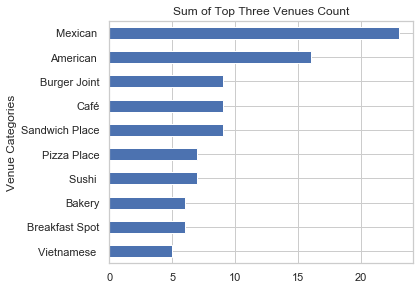

In [328]:
top_three.index = top_three.index.str.replace('Restaurant', "")
sum_ = top_three['sum'].sort_values()
sum_[-10:].plot(kind='barh')
plt.tight_layout()
plt.title('Sum of Top Three Venues Count')
plt.savefig('Most Popular Top Three Three Venues in the Bay')

In [247]:
 top_three = top_three.set_index('Venue Categories').fillna(0)

KeyError: "None of ['Venue Categories'] are in the columns"

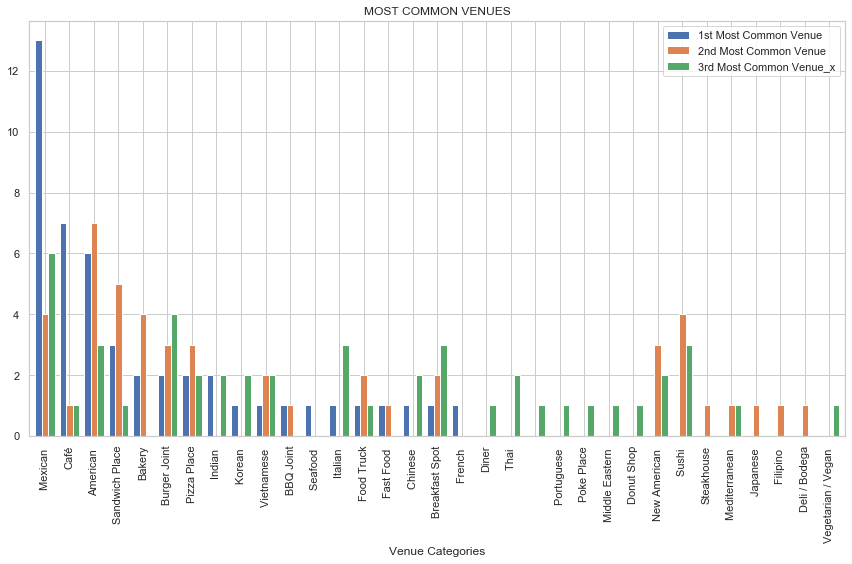

In [333]:


ax = top_three.iloc[:, 0:3].sort_values(by='1st Most Common Venue', ascending=False).plot(kind='bar', width=.8, figsize=(12, 8), title='MOST COMMON VENUES')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig('Top Three Venue Categories Bar Chart.png')

In [184]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.barplot(x=most_common.index.names[0], hue='Cluster_Labels', data=df_hos_clusters)

ValueError: Could not interpret input 'Cluster_Labels'